<a href="https://colab.research.google.com/github/s24966904/note/blob/main/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92/RegressionTreeBoston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [3]:
import pandas as pd

df=pd.DataFrame(boston["data"],columns=boston['feature_names'])

target=pd.DataFrame(boston["target"],columns=['target_names'])
df["target"]=target
df.to_csv("iris.csv",encoding="utf-8",index=False)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
"""
CRIM：城鎮人均犯罪率。

ZN：住宅用地超過 25000 sq.ft. 的比例。

INDUS：城鎮非零售商用土地的比例。

CHAS：查理斯河空變量（如果邊界是河流，則爲1；否則爲0）。

NOX：一氧化氮濃度。

RM：住宅平均房間數。

AGE：1940 年之前建成的自用房屋比例。

DIS：到波士頓五個中心區域的加權距離。

RAD：輻射性公路的接近指數。

TAX：每 10000 美元的全值財產稅率。

PTRATIO：城鎮師生比例。

B：1000（Bk-0.63）^ 2，其中 Bk 指代城鎮中黑人的比例。

LSTAT：人口中地位低下者的比例。

MEDV：自住房的平均房價，以千美元計。
"""

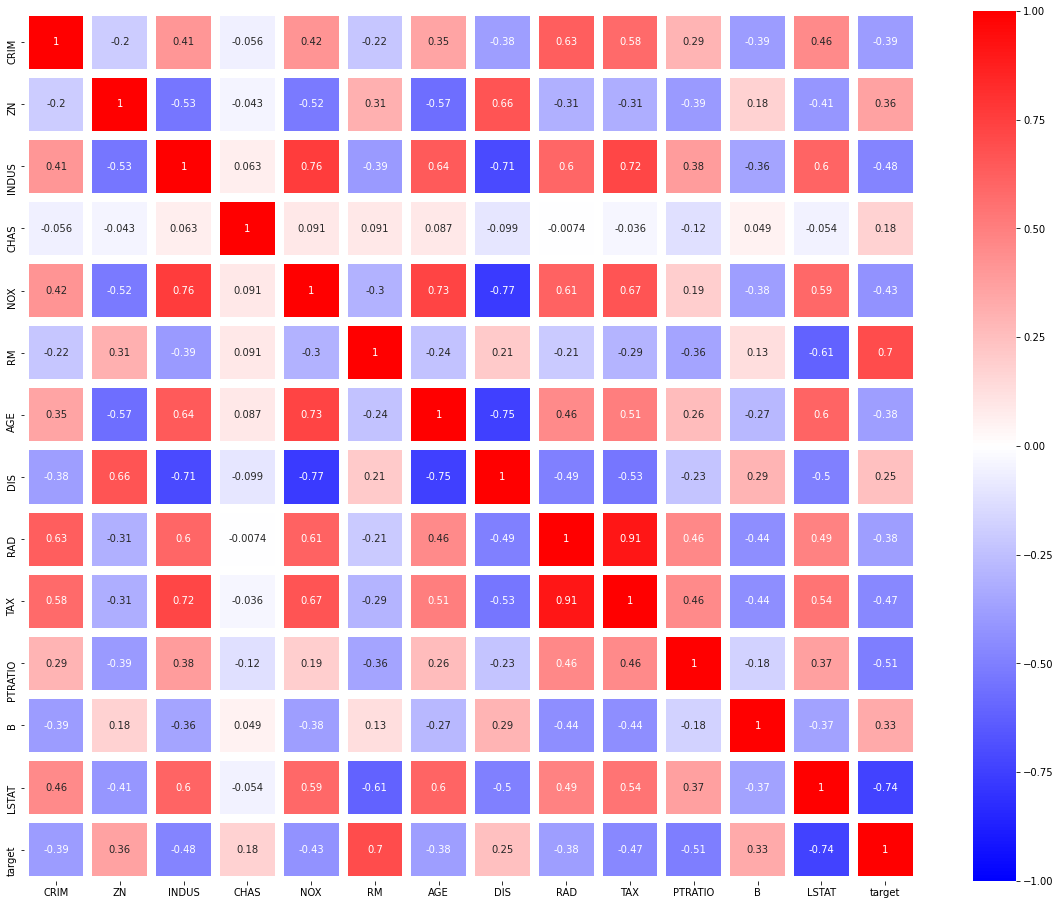

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.figure(figsize=(20,16))
sns.heatmap(df.astype(float).corr(),vmin=-1, vmax=1,center=0,annot=True,linewidths=8,cmap="bwr")#挑選顏色matplotlib colormap

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(['target'],axis=1),df['target'],test_size=.1)

In [28]:
from sklearn.tree import DecisionTreeRegressor
reg =DecisionTreeRegressor(max_depth=6 )
reg.fit(x_train,y_train)
#mse 均方誤差 Mean-Square Error 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

$MSE=\sum_{i=1}^{n} (y_i-y_i^p)^2$
 <br>均方誤差 (MSE) 是最常用的回歸損失函數，計算方法是求預測值與真實值之間距離的平方和

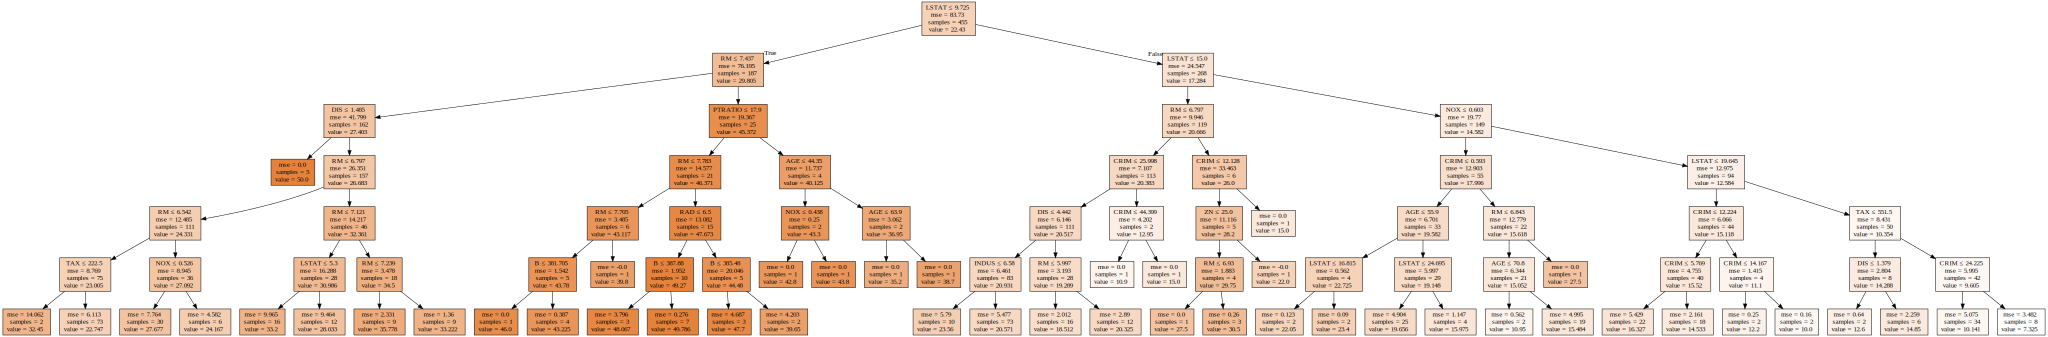

In [29]:
import graphviz
from sklearn.tree import export_graphviz
g=export_graphviz(reg,out_file=None,feature_names=boston['feature_names'],filled=True,special_characters=True)
graph=graphviz.Source(g)
graph

In [30]:
pre =reg.predict(x_test)
print('預測標籤',list(pre))
print('真正標籤',list(y_test))
from sklearn.metrics import r2_score
print("r2",r2_score(y_test,pre))

預測標籤 [20.571232876712322, 49.785714285714285, 14.85, 27.67666666666667, 22.74657534246575, 22.74657534246575, 35.777777777777786, 20.571232876712322, 22.74657534246575, 14.533333333333335, 20.571232876712322, 18.5125, 20.571232876712322, 20.571232876712322, 22.74657534246575, 7.324999999999999, 22.74657534246575, 10.141176470588237, 15.484210526315787, 22.74657534246575, 10.141176470588237, 16.32727272727273, 28.033333333333335, 22.74657534246575, 24.166666666666668, 19.656, 20.571232876712322, 22.74657534246575, 46.0, 33.2, 46.0, 20.571232876712322, 10.141176470588237, 14.85, 18.5125, 22.74657534246575, 16.32727272727273, 38.7, 22.74657534246575, 15.484210526315787, 20.571232876712322, 27.67666666666667, 20.571232876712322, 33.222222222222214, 23.56, 20.571232876712322, 48.06666666666666, 35.777777777777786, 16.32727272727273, 22.74657534246575, 22.74657534246575]
真正標籤 [20.4, 50.0, 14.4, 24.5, 23.9, 20.4, 31.6, 22.0, 24.2, 17.8, 16.1, 18.9, 19.2, 20.6, 25.0, 10.5, 20.6, 13.3, 13.8, 22